# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())


# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Create a dataframe to store the data
city_df = pd.DataFrame({"City": [city.capitalize() for city in cities], "Country": countries, 
                        "Latitude": "", "Longitude": "", "Temperature (F)": "", "Humidity (%)": "", 
                        "Wind Speed (mph)": "", "Cloudiness (%)": "", "Date": ""})

city_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Wind Speed (mph),Cloudiness (%),Date
0,Rikitea,PF,,,,,,,
1,Sarakhs,IR,,,,,,,
2,Taolanaro,MG,,,,,,,
3,Butaritari,KI,,,,,,,
4,Illoqqortoormiut,GL,,,,,,,


In [5]:
# keeps count of those cities whose weather information is successfully obtained
city_count = 0
api_call_count = 1

# For each city in the dataframe, do the following: 
for index,row in city_df.iterrows():
    city_name = row["City"]
    country_id = row["Country"]
    
    # create a dictionary to contain the query parameters
    search_parameters = {
        "q": str(city_name)+","+str(country_id),
        "units": "imperial",
        "mode": "json",
        "appid": weather_api_key
    }
    
    #api call for all cities 
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    response = requests.get(base_url, params = search_parameters).json()
    
    try:
        city_df.loc[index,"Latitude"] = response["coord"]["lat"]
        city_df.loc[index,"Longitude"] = response["coord"]["lon"]
        city_df.loc[index,"Temperature (F)"] = response["main"]["temp_max"]
        city_df.loc[index,"Humidity (%)"] = response["main"]["humidity"]
        city_df.loc[index,"Wind Speed (mph)"] = response["wind"]["speed"]
        city_df.loc[index,"Cloudiness (%)"] = response["clouds"]["all"]
        city_df.loc[index,"Date"] = response["dt"]

        #print log for each city
        print(f"Processing Record {api_call_count} | {city_name}" )
        
        city_count = city_count + 1 
    
    except KeyError:
        city_df.loc[index,"Latitude"] = np.nan
        city_df.loc[index,"Longitude"] = np.nan
        city_df.loc[index,"Temperature (F)"] = np.nan
        city_df.loc[index,"Humidity (%)"] = np.nan
        city_df.loc[index,"Cloudiness (%)"] = np.nan
        city_df.loc[index,"Wind Speed (mph)"] = np.nan
        city_df.loc[index,"Date"] = np.nan

        print(f"Missing weather information for city {city_name}")
    api_call_count = api_call_count + 1        

        
print(f"Processing successfully completed. Retrieved weather information for {city_count} cities")


Processing Record 1 | Rikitea
Processing Record 2 | Sarakhs
Missing weather information for city Taolanaro
Processing Record 4 | Butaritari
Missing weather information for city Illoqqortoormiut
Processing Record 6 | Kristiinankaupunki
Processing Record 7 | Mitsamiouli
Processing Record 8 | Kruisfontein
Processing Record 9 | Oistins
Processing Record 10 | Albany
Processing Record 11 | Mar del plata
Processing Record 12 | Baiyin
Processing Record 13 | Teahupoo
Processing Record 14 | Cidreira
Processing Record 15 | Los llanos de aridane
Processing Record 16 | Surt
Processing Record 17 | Peru
Processing Record 18 | Caravelas
Processing Record 19 | Cape town
Processing Record 20 | Pangai
Processing Record 21 | Gushikawa
Processing Record 22 | Vilhena
Processing Record 23 | Buraydah
Processing Record 24 | Plainview
Missing weather information for city Bargal
Processing Record 26 | Hermanus
Processing Record 27 | Saint-philippe
Processing Record 28 | Devarkonda
Processing Record 29 | Ambon
Pr

Processing Record 238 | Iqaluit
Missing weather information for city Falealupo
Processing Record 240 | Soligalich
Processing Record 241 | Isfana
Processing Record 242 | Concepcion del uruguay
Processing Record 243 | Havoysund
Processing Record 244 | Lityn
Processing Record 245 | Fairbanks
Processing Record 246 | Terrace
Processing Record 247 | Basco
Processing Record 248 | Nisia floresta
Processing Record 249 | Honningsvag
Processing Record 250 | Starobesheve
Processing Record 251 | Tiksi
Processing Record 252 | Broome
Processing Record 253 | Vanimo
Processing Record 254 | Dunedin
Processing Record 255 | Andenes
Processing Record 256 | Cockburn town
Processing Record 257 | Ostuacan
Processing Record 258 | Pritzwalk
Processing Record 259 | Hambantota
Processing Record 260 | El cobre
Processing Record 261 | Batemans bay
Processing Record 262 | Bilma
Processing Record 263 | Angoche
Processing Record 264 | Dalby
Processing Record 265 | Flin flon
Processing Record 266 | Nishihara
Processing

Processing Record 473 | Rocha
Processing Record 474 | Aleksandrov gay
Processing Record 475 | Chigorodo
Processing Record 476 | Kavos
Processing Record 477 | Galeana
Processing Record 478 | Beringovskiy
Processing Record 479 | Hobyo
Processing Record 480 | Zhanakorgan
Processing Record 481 | Sikasso
Processing Record 482 | Mount gambier
Processing Record 483 | Moose factory
Processing Record 484 | Khipro
Processing Record 485 | Carutapera
Processing Record 486 | Arica
Processing Record 487 | Lavrentiya
Processing Record 488 | Hearst
Processing Record 489 | Ust-koksa
Processing Record 490 | Muros
Processing Record 491 | Assiniboia
Processing Record 492 | Dzhuryn
Processing Record 493 | Varhaug
Processing Record 494 | San jeronimo
Processing Record 495 | Santo antonio do leverger
Processing Record 496 | Eyemouth
Processing Record 497 | Plouzane
Processing Record 498 | Ternate
Processing Record 499 | Pingliang
Missing weather information for city Airai
Missing weather information for city

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# remove missing data
city_df = city_df.dropna()

# displays the count of unique cities
print(f"Retrieved weather information for {city_count} cities.")

Retrieved weather information for 536 cities.


In [7]:
# change date format
city_df["Date"] = pd.to_datetime(city_df["Date"], unit = "s")
city_df["Date"] = city_df["Date"].dt.date

# display the dataframe
city_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Wind Speed (mph),Cloudiness (%),Date
0,Rikitea,PF,-23.12,-134.97,69.08,66,5.84,0,2020-08-28
1,Sarakhs,IR,36.54,61.16,71.6,33,4.7,0,2020-08-28
3,Butaritari,KI,3.07,172.79,82.29,74,15.43,99,2020-08-28
5,Kristiinankaupunki,FI,62.27,21.38,50.07,70,7.29,50,2020-08-28
6,Mitsamiouli,KM,-11.38,43.28,75.25,78,8.43,15,2020-08-28


In [8]:
# save output csv
output_data_file = "output_data/cities.csv"
city_df.to_csv(output_data_file, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# check max value of humidity
max(city_df["Humidity (%)"])

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

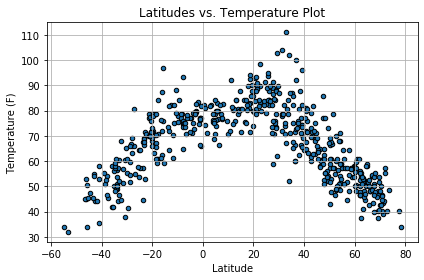

In [10]:
city_df.plot.scatter(x="Latitude", y="Temperature (F)", marker="o", grid = True, edgecolor = "black")
# set title and labels
plt.title("Latitudes vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
# save graph 
plt.tight_layout()
plt.savefig("Images/lat_vs_temp.png")
# print plot
plt.show()

## Latitude vs. Humidity Plot

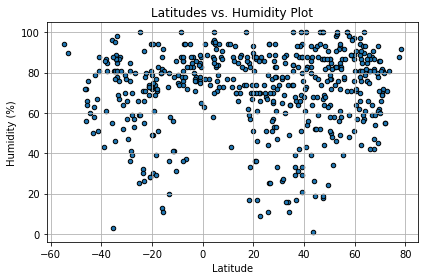

In [11]:
city_df.plot.scatter(x="Latitude", y="Humidity (%)", marker="o", grid = True, edgecolor = "black")
# set title and labels
plt.title("Latitudes vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# save graph 
plt.tight_layout()
plt.savefig("Images/lat_vs_humi.png")
# print plot
plt.show()

## Latitude vs. Cloudiness Plot

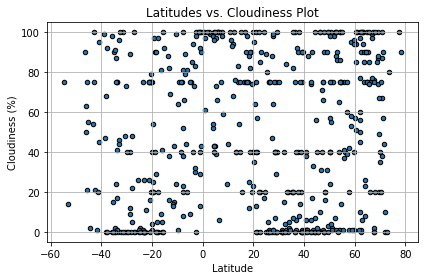

In [12]:
city_df.plot.scatter(x="Latitude", y="Cloudiness (%)", marker="o", grid = True, edgecolor = "black")
# set title and labels
plt.title("Latitudes vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# save graph 
plt.tight_layout()
plt.savefig("Images/lat_vs_cloud.png")
# print plot
plt.show()

## Latitude vs. Wind Speed Plot

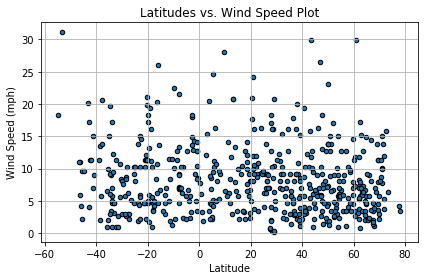

In [13]:
city_df.plot.scatter(x="Latitude", y="Wind Speed (mph)", marker="o", grid = True, edgecolor = "black")
# set title and labels
plt.title("Latitudes vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# save graph 
plt.tight_layout()
plt.savefig("Images/lat_vs_wind.png")
# print plot
plt.show()

## Linear Regression

In [14]:
# separate northern and southern hemisphere
northern_df = city_df.loc[city_df["Latitude"] >= 0]
southern_df = city_df.loc[city_df["Latitude"] < 0]

In [15]:
northern_lat = northern_df["Latitude"].astype(float)
northern_temp = northern_df["Temperature (F)"].astype(float)
northern_humidity = northern_df["Humidity (%)"].astype(float)
northern_cloud = northern_df["Cloudiness (%)"].astype(float)
northern_wind = northern_df["Wind Speed (mph)"].astype(float)
southern_lat = southern_df["Latitude"].astype(float)
southern_temp = southern_df["Temperature (F)"].astype(float)
southern_humidity = southern_df["Humidity (%)"].astype(float)
southern_cloud = southern_df["Cloudiness (%)"].astype(float)
southern_wind = southern_df["Wind Speed (mph)"].astype(float)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

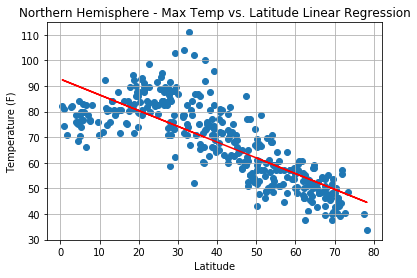

The linear regression equation is y = -0.62x + 92.7.



In [16]:
# compute the linear regression equation and add regression line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat,northern_temp)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_lat,northern_temp)
plt.plot(northern_lat,regress_values,"r-")
plt.grid(True)

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Images/regression_northern_temp_vs_lat.png")
plt.show() 

print(f"The linear regression equation is {line_eq}.\n")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

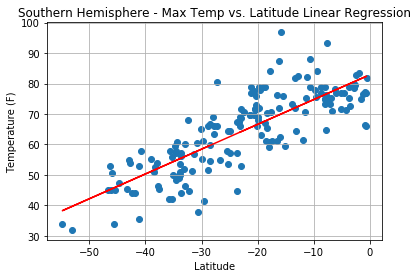

The linear regression equation is y = 0.81x + 82.89.



In [17]:
# compute the linear regression equation and add regression line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat,southern_temp)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_lat,southern_temp)
plt.plot(southern_lat,regress_values,"r-")
plt.grid(True)

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Images/regression_southern_temp_vs_lat.png")
plt.show() 

print(f"The linear regression equation is {line_eq}.\n")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

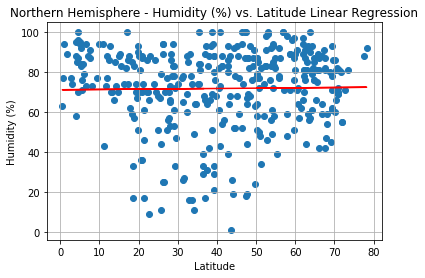

The linear regression equation is y = 0.02x + 71.19.



In [18]:
# compute the linear regression equation and add regression line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat,northern_humidity)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_lat,northern_humidity)
plt.plot(northern_lat,regress_values,"r-")
plt.grid(True)

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Images/regression_northern_humidity_vs_lat.png")
plt.show() 

print(f"The linear regression equation is {line_eq}.\n")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

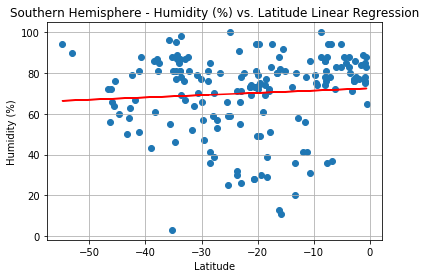

The linear regression equation is y = 0.11x + 72.48.



In [19]:
# compute the linear regression equation and add regression line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat,southern_humidity)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_lat,southern_humidity)
plt.plot(southern_lat,regress_values,"r-")
plt.grid(True)

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Images/regression_southern_humidity_vs_lat.png")
plt.show() 

print(f"The linear regression equation is {line_eq}.\n")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

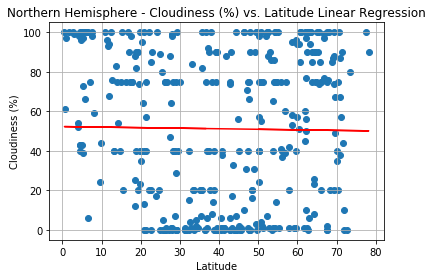

The linear regression equation is y = -0.03x + 52.28.



In [20]:
# compute the linear regression equation and add regression line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat,northern_cloud)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_lat,northern_cloud)
plt.plot(northern_lat,regress_values,"r-")
plt.grid(True)

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Images/regression_northern_cloud_vs_lat.png")
plt.show() 

print(f"The linear regression equation is {line_eq}.\n")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

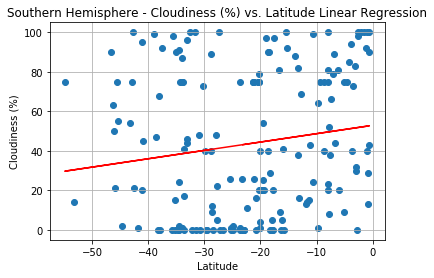

The linear regression equation is y = 0.42x + 52.92.



In [21]:
# compute the linear regression equation and add regression line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat,southern_cloud)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_lat,southern_cloud)
plt.plot(southern_lat,regress_values,"r-")
plt.grid(True)

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Images/regression_southern_cloud_vs_lat.png")
plt.show() 

print(f"The linear regression equation is {line_eq}.\n")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

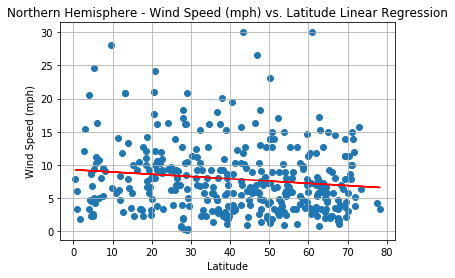

The linear regression equation is y = -0.03x + 9.27.



In [22]:
# compute the linear regression equation and add regression line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat,northern_wind)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_lat,northern_wind)
plt.plot(northern_lat,regress_values,"r-")
plt.grid(True)

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/regression_northern_wind_vs_lat.png")
plt.show() 

print(f"The linear regression equation is {line_eq}.\n")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

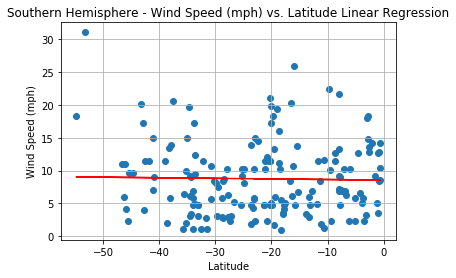

The linear regression equation is y = -0.01x + 8.55.



In [23]:
# compute the linear regression equation and add regression line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat,southern_wind)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_lat,southern_wind)
plt.plot(southern_lat,regress_values,"r-")
plt.grid(True)

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/regression_southern_wind_vs_lat.png")
plt.show() 

print(f"The linear regression equation is {line_eq}.\n")